In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prepare_yerevan_data import prepare_yerevan_data_nitrogen_dioxide
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
air_data = prepare_yerevan_data_nitrogen_dioxide()
air_data.head()

,temperature_2m,wind_speed_10m,relative_humidity_2m,precipitation,surface_pressure,pm10,pm2_5,nitrogen_dioxide
0,0.0,1.163151,58,0.0,904.9,2.406945,2.174752,34.8
1,-0.1,1.526056,58,0.0,906.5,2.322388,2.163323,32.1
2,1.0,0.741937,53,0.0,907.4,2.251292,2.091864,28.6
3,0.2,1.629241,56,0.0,907.1,2.197225,2.054124,25.3
4,-0.6,1.589235,59,0.0,907.0,2.066863,1.902108,20.4


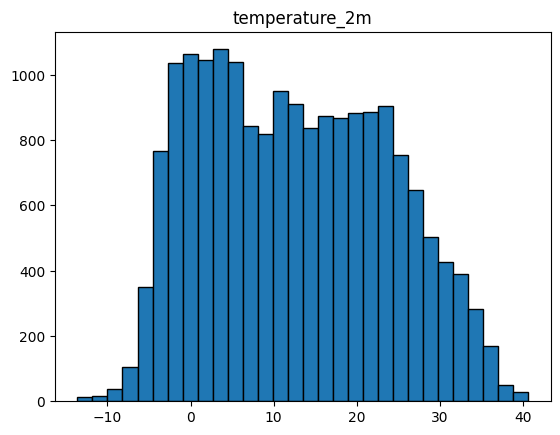

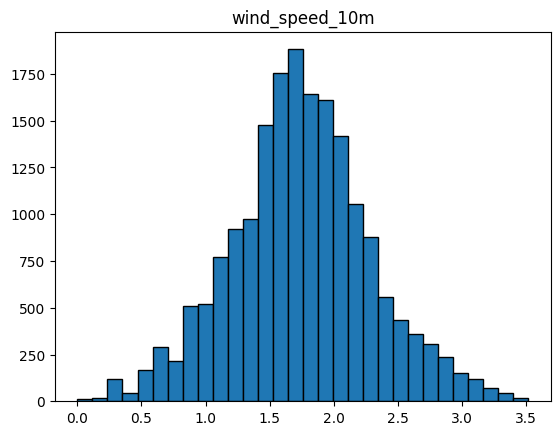

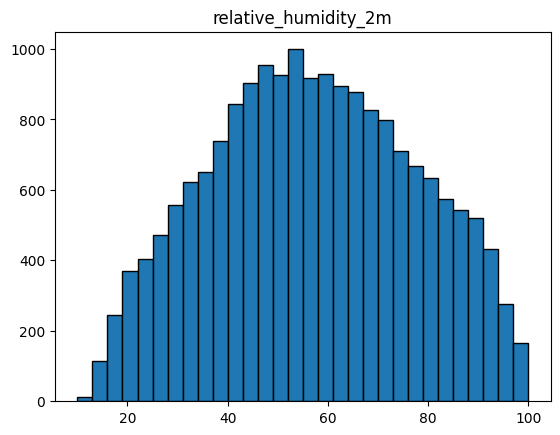

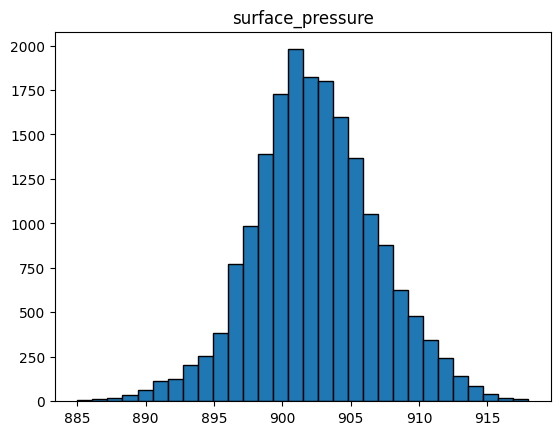

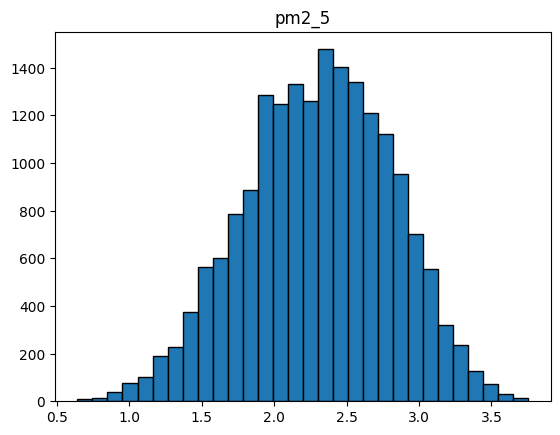

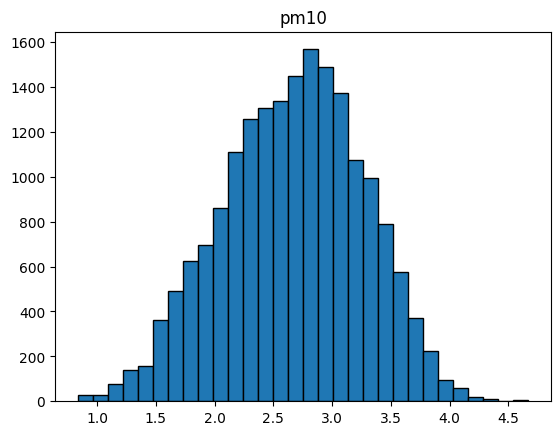

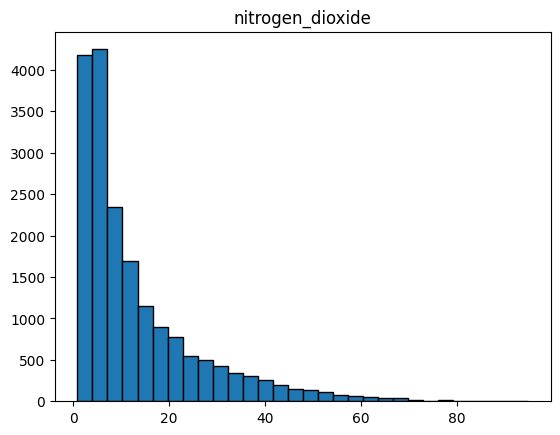

In [3]:
columns = ['temperature_2m',
           'wind_speed_10m',
           'relative_humidity_2m',
           'surface_pressure',
           'pm2_5',
           'pm10',
           'nitrogen_dioxide'
           ]

for col in columns:
    plt.title(col)
    plt.hist(air_data[col], edgecolor='k', bins=30)
    plt.show()

In [4]:
y = air_data['nitrogen_dioxide']
X = air_data.drop(columns=['nitrogen_dioxide'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=False)

In [5]:
model = XGBRegressor(
    random_state=42,
    gamma=0.15,
    learning_rate=0.005,
    n_estimators=2500,
    max_depth=3,
)

In [6]:
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
y_pred = model.predict(X_test)

In [8]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")

MAE: 8.020
RMSE: 10.950
R^2: 0.484


In [9]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

                Feature  Importance
0        temperature_2m    0.513029
6                 pm2_5    0.165675
5                  pm10    0.156878
4      surface_pressure    0.052699
1        wind_speed_10m    0.046900
2  relative_humidity_2m    0.042207
3         precipitation    0.022612
